In [2]:
import scipy.special as ss
import scipy.integrate as integrate
import numpy as np
from functools import lru_cache

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
@lru_cache(None)  # cache
def u_p_prime_n(p_prime, n):
    return ss.jn_zeros(p_prime, n)[-1]

def n_term_integrand(p, q, p_prime, n, t):
    u_p_q = ss.jn_zeros(p, q)[-1]
    u_p_prime_n_value = u_p_prime_n(p_prime, n)
    return t * ss.jv(p, u_p_q * t) * ss.jv(p_prime, u_p_prime_n_value * t) / ss.jv(p_prime + 1, u_p_prime_n_value)

In [4]:
def find_l_values(p, q, epsilon_by_r, p_prime_range):
    
    u_p_q = ss.jn_zeros(p, q)[-1]
    lower_bound = ss.jv(p + 1, u_p_q)**2 / 4 - epsilon_by_r**2 / 2

    l_values = []
    
    for p_prime in p_prime_range:
    
        l = 1    
        l_term_sum = 0
    
        while True:
        
            lth_term_integral, _ = integrate.quad(lambda t: n_term_integrand(p, q, p_prime, l, t), 0, 1)
            l_term_sum += lth_term_integral ** 2
    
            if l_term_sum > lower_bound:
                # print(p_prime, l)
                break
    
            l += 1

        l_values.append(l)

    return l_values

In [5]:
def linear_regression(x_values, y_values):
    n = len(x_values)
    sum_x = sum(x_values)
    sum_y = sum(y_values)
    sum_xy = sum(x * y for x, y in zip(x_values, y_values))
    sum_x_squared = sum(x ** 2 for x in x_values)
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    y_intercept = (sum_y - slope * sum_x) / n
    return slope, y_intercept


In [8]:
m_values = []
c_values = []

p_prime_range = range(1, 11)
p = 2
q = 1
epsilon_by_r_range = range(1, 37)

for epsilon_by_r_100x in epsilon_by_r_range:
    epsilon_by_r = epsilon_by_r_100x/100
    x_values = list(p_prime_range)
    y_values = find_l_values(p, q, epsilon_by_r, p_prime_range)
    print(y_values)
    m, c = linear_regression(x_values, y_values)
    print("slope ", m, "y-intercept", c)
    m_values.append(m)
    c_values.append(c)
    print(epsilon_by_r)

[2, 1, 3, 4, 6, 7, 8, 9, 10, 11]
slope  1.1333333333333333 y-intercept -0.13333333333333286
0.01
[2, 1, 2, 3, 4, 5, 6, 6, 7, 8]
slope  0.7636363636363637 y-intercept 0.2
0.02
[2, 1, 2, 2, 3, 4, 4, 5, 6, 6]
slope  0.5636363636363636 y-intercept 0.40000000000000036
0.03
[2, 1, 2, 2, 3, 3, 4, 4, 5, 5]
slope  0.4303030303030303 y-intercept 0.7333333333333332
0.04
[2, 1, 1, 2, 2, 3, 3, 4, 4, 5]
slope  0.40606060606060607 y-intercept 0.4666666666666668
0.05
[1, 1, 1, 2, 2, 2, 3, 3, 4, 4]
slope  0.3696969696969697 y-intercept 0.2666666666666668
0.06
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4]
slope  0.32727272727272727 y-intercept 0.4
0.07
[1, 1, 1, 1, 2, 2, 2, 3, 3, 3]
slope  0.2727272727272727 y-intercept 0.4000000000000002
0.08
[1, 1, 1, 1, 2, 2, 2, 2, 3, 3]
slope  0.24242424242424243 y-intercept 0.4666666666666666
0.09
[1, 1, 1, 1, 1, 2, 2, 2, 2, 3]
slope  0.20606060606060606 y-intercept 0.4666666666666668
0.1
[1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
slope  0.15151515151515152 y-intercept 0.6666666666666666
0.1

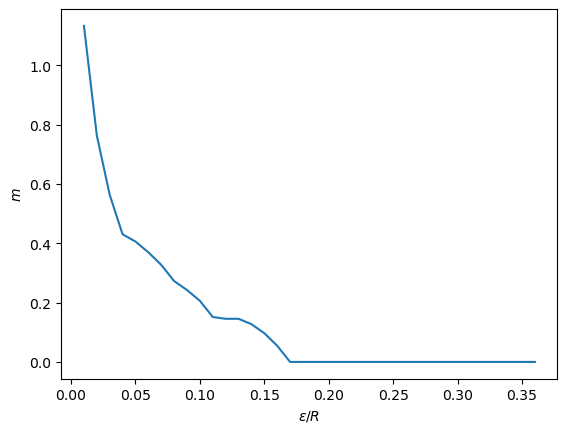

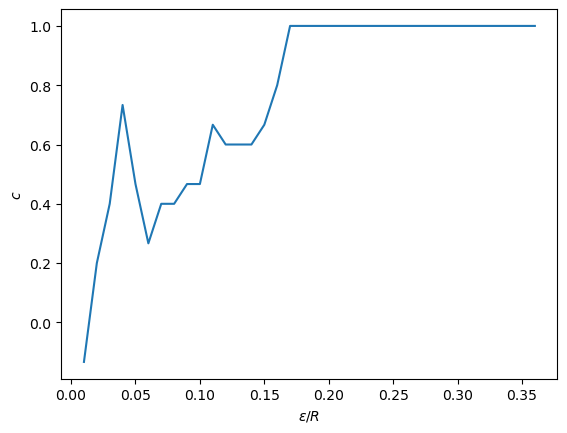

In [9]:
import matplotlib.pyplot as plt

epsilon_by_r_list = [i/100 for i in epsilon_by_r_range]

plt.plot(epsilon_by_r_list, m_values)
plt.xlabel("$\epsilon/R$")
plt.ylabel("$m$")
plt.show()

plt.plot(epsilon_by_r_list, c_values)
plt.xlabel("$\epsilon/R$")
plt.ylabel("$c$")
plt.show()

In [7]:
import numpy as np
from scipy.optimize import curve_fit

# Define the model function y = a/x + b
def model(x, a, b):
    return a / x + b

# Example x and y data points
x_values = np.array(epsilon_by_r_list)
y_values = np.array(m_values)

# Fit the curve
params, _ = curve_fit(model, x_values, y_values)
a, b = params

print(f"Best fit values: a = {a}, b = {b}")


Best fit values: a = 0.031166293947163096, b = 0.011996392534244959


In [8]:
# Predicted values from the fitted curve
fitted_y = model(x_values, *params)

# Compute residuals
residuals = y_values - fitted_y

# Calculate error metrics
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(np.mean(residuals**2))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_values - np.mean(y_values))**2)
r_squared = 1 - (ss_res / ss_tot)

# Print the metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r_squared)


MAE: 0.13023724736614092
RMSE: 0.15667192590457096
R-squared: 0.9257014173999655


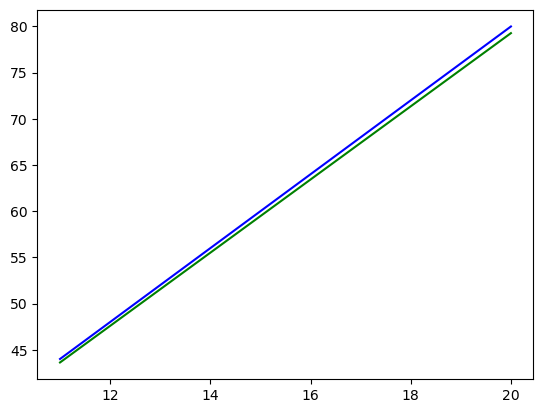

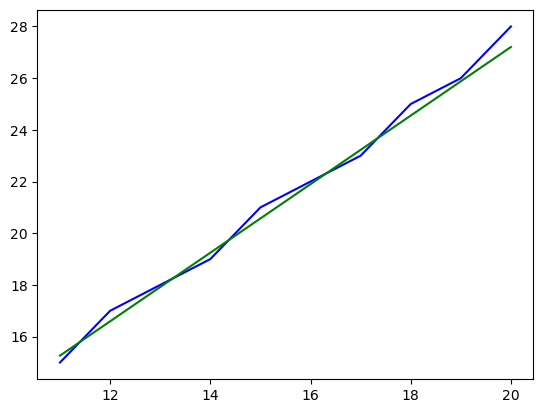

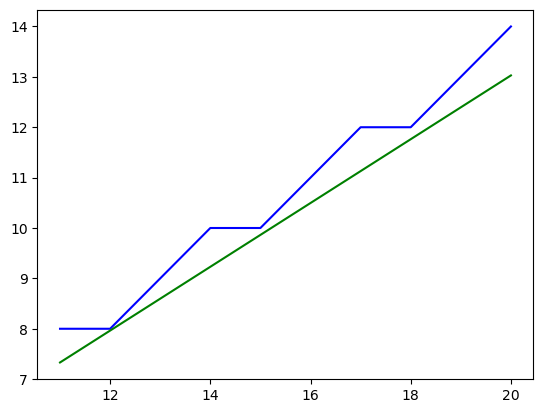

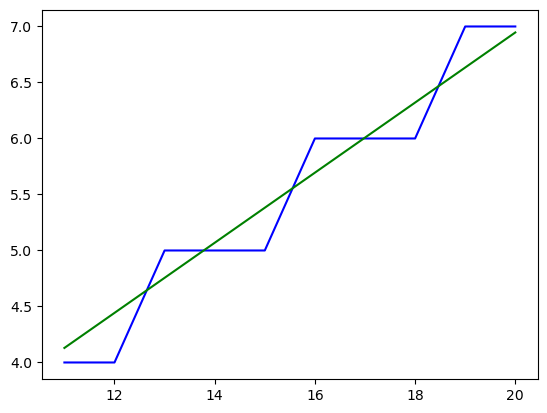

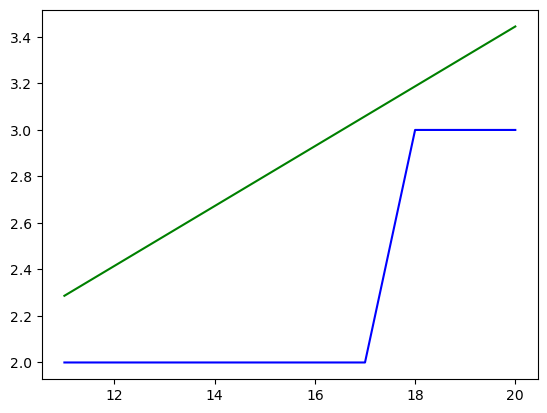

In [16]:
new_p_prime_range = list(range(11, 21))
epsilon_by_r_list2 = [0.05, 0.12, 0.19, 0.26, 0.33]

for epsilon_by_r in epsilon_by_r_list2:
    
    terms_list = find_l_values(0, 1, epsilon_by_r, new_p_prime_range)
    temp_list = find_l_values(0, 1, epsilon_by_r, range(1, 2))
    predicted_terms_list = []
    
    for p_prime in new_p_prime_range:
        predicted_terms_list.append((a/epsilon_by_r + b) * (p_prime - 1) + temp_list[0])

    plt.plot(new_p_prime_range, terms_list, color = 'blue')
    plt.plot(new_p_prime_range, predicted_terms_list, color = 'green')
    plt.show()

In [10]:
from matplotlib.ticker import MaxNLocator

/tmp/ipykernel_15246/2795342918.py:15: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  lth_term_integral, _ = integrate.quad(lambda t: n_term_integrand(p, q, p_prime, l, t), 0, 1)


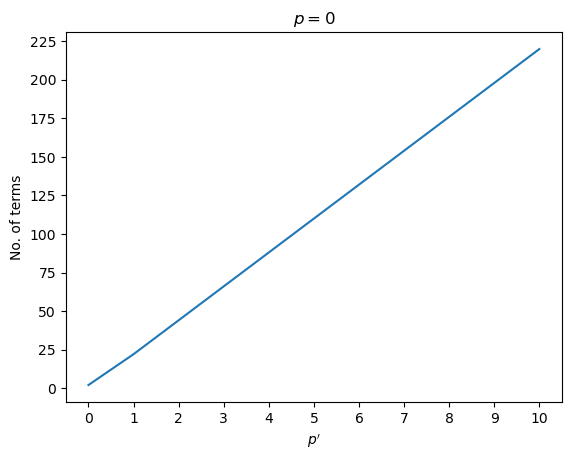

0


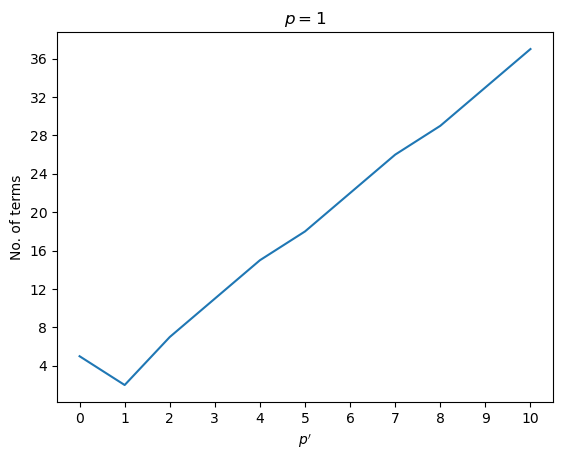

1


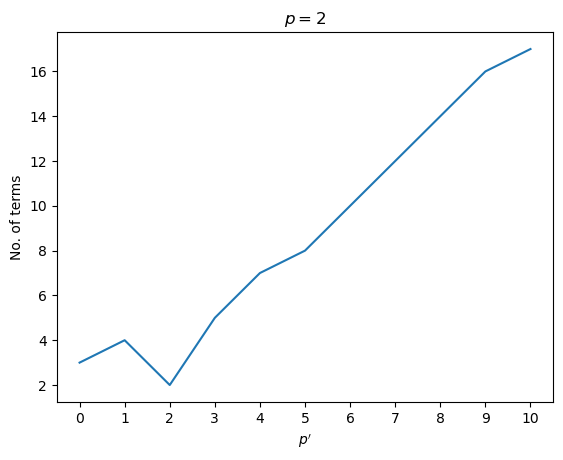

2


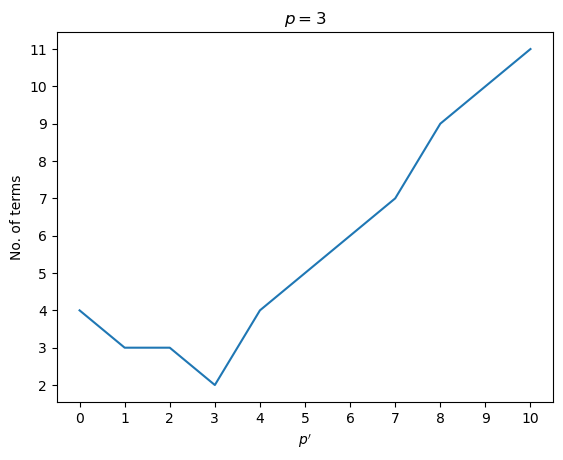

3


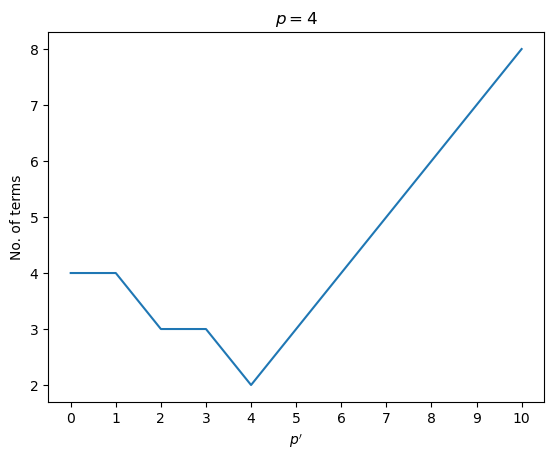

4


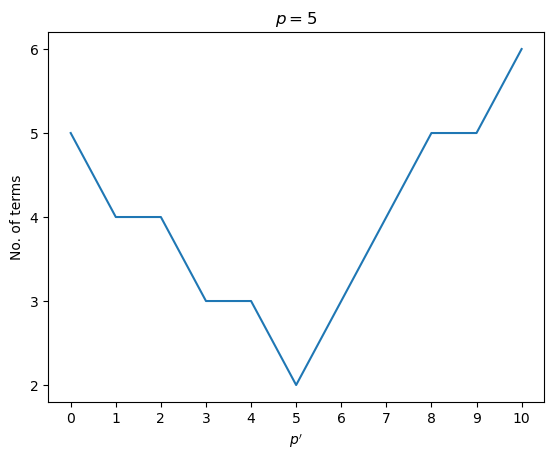

5


In [17]:
p_prime_range = list(range(0, 11))
for p in range(0, 6):
    fig, ax = plt.subplots()
    # ax.plot(x, y)
    ax.plot(p_prime_range, find_l_values(p, 2, 0.01, p_prime_range))
    #print(find_l_values)
    #ax.xticks(p_prime_range)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(p_prime_range)
    plt.xlabel("$p'$")
    plt.ylabel("No. of terms")
    plt.title(f"$p = {p}$")
    plt.show()
    print(p)